# Genetic Linear Regression with Numpy
A solution... via evolution!

In [322]:
import numpy as np
import matplotlib.pyplot as plt

In [311]:
sample_num = 10
beta_true = [3, 5]
x_obs = np.random.normal(5, 3, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(x_obs, 2, sample_num)

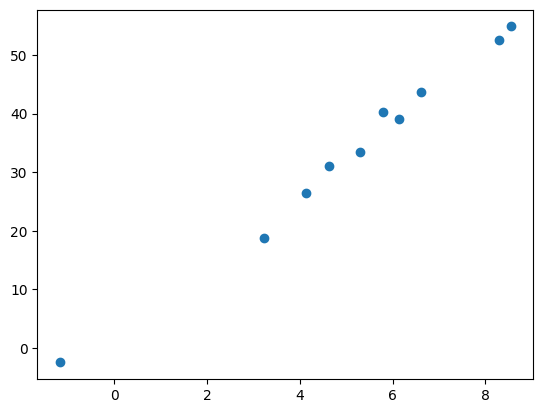

In [312]:
plt.scatter(x_obs, y_obs);

In [350]:
def get_fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [244]:
beta = np.random.normal(-10,10, 2)
beta

array([ -2.84967731, -17.13110628])

In [314]:
fitness([  18.54413807,   3.36654949])

np.float64(7.505361456773878)

In [323]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[ 17.02981298,   6.397697  ],
       [  8.7807527 , -10.9599045 ],
       [  6.15149197,  22.88220339],
       [  3.42648538,  22.60068446],
       [ 13.8999849 ,  16.88462672],
       [ -4.69379819,  -2.56425964],
       [ -3.8308622 ,  -8.34946189],
       [ -7.54421677,  -3.70975658],
       [ -4.12258281,  -0.57815806],
       [ -1.49314018,   6.09234899]])

In [324]:
def rank(betas, fitness):
    scored = np.column_stack((betas, np.apply_along_axis(fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [353]:
ranked = rank(betas, fitness)
ranked

array([[ 2.67642774,  5.99980872,  1.61968527],
       [ 1.85347167,  6.12549957,  1.67246376],
       [ 1.83227511,  6.19346864,  1.67330856],
       [ 2.38718694,  6.16278811,  1.69163042],
       [ 4.01590815,  5.84521625,  1.70975394],
       [ 1.79232009,  6.09775157,  1.71787792],
       [ 1.83460149,  6.25529008,  1.74883261],
       [ 0.97487773,  6.33355542,  1.81867669],
       [ 1.27401275,  6.14988401,  1.83674811],
       [ 2.33115133,  6.23627065,  1.83981892],
       [ 0.80137135,  6.3078937 ,  1.84306198],
       [ 2.49295206,  6.23439087,  1.90017853],
       [ 1.41943693,  6.39819507,  1.99015911],
       [ 1.25756898,  6.42693201,  2.02545546],
       [ 1.95643926,  6.35485835,  2.0550214 ],
       [ 5.60881476,  5.58631594,  2.06745172],
       [ 2.4397908 ,  5.82157432,  2.15875204],
       [ 2.71240087,  6.29669361,  2.24097103],
       [-0.27533239,  6.34181741,  2.28363371],
       [ 1.74444113,  5.8919126 ,  2.34642827],
       [ 1.49450673,  5.92623159,  2.388

In [329]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [354]:
survivors = select(ranked, 0.2)
survivors

array([[ 2.67642774,  5.99980872,  1.61968527],
       [ 1.85347167,  6.12549957,  1.67246376],
       [ 1.83227511,  6.19346864,  1.67330856],
       [ 2.38718694,  6.16278811,  1.69163042],
       [ 4.01590815,  5.84521625,  1.70975394],
       [ 1.79232009,  6.09775157,  1.71787792],
       [ 1.83460149,  6.25529008,  1.74883261],
       [ 0.97487773,  6.33355542,  1.81867669],
       [ 1.27401275,  6.14988401,  1.83674811],
       [ 2.33115133,  6.23627065,  1.83981892],
       [ 0.80137135,  6.3078937 ,  1.84306198],
       [ 2.49295206,  6.23439087,  1.90017853],
       [ 1.41943693,  6.39819507,  1.99015911],
       [ 1.25756898,  6.42693201,  2.02545546],
       [ 1.95643926,  6.35485835,  2.0550214 ],
       [ 5.60881476,  5.58631594,  2.06745172],
       [ 2.4397908 ,  5.82157432,  2.15875204],
       [ 2.71240087,  6.29669361,  2.24097103],
       [-0.27533239,  6.34181741,  2.28363371],
       [ 1.74444113,  5.8919126 ,  2.34642827]])

In [356]:
sampling_weights = np.linspace(1, 0, survivors.shape[0])
sampling_weights /= weights.sum()
sampling_weights

array([0.1       , 0.09473684, 0.08947368, 0.08421053, 0.07894737,
       0.07368421, 0.06842105, 0.06315789, 0.05789474, 0.05263158,
       0.04736842, 0.04210526, 0.03684211, 0.03157895, 0.02631579,
       0.02105263, 0.01578947, 0.01052632, 0.00526316, 0.        ])

In [289]:
# crossover
cross_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True)
cross_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True)
cross_betas = np.column_stack((cross_b0, cross_b1))

# mutation
mut = np.random.normal(0, 1, (gen_size, 2))

betas = cross_betas + mut
betas

array([[-0.41401975,  7.00685483],
       [-1.10499099,  6.74137172],
       [-5.48688157,  4.06484199],
       [-2.20819581,  4.77656722],
       [-6.15780444,  5.85793823],
       [ 0.49973848,  4.00719422],
       [ 0.41496576,  5.3531878 ],
       [ 9.18664154,  7.19113514],
       [ 8.42713916,  8.1524785 ],
       [-4.46256206,  5.84369234]])

In [279]:
betas + mut

array([[-4.23438012,  3.89439324],
       [ 7.0471856 ,  5.41578077],
       [ 8.43401771,  5.83348836],
       [-0.47134067,  6.26662166],
       [10.5508555 ,  6.09853122],
       [ 0.66865011,  7.09214429],
       [ 9.28926895,  7.58811611],
       [ 7.95823808,  4.4486359 ],
       [-4.98544228,  7.42151411],
       [ 9.0729611 ,  7.82712536]])

In [173]:
np.random.normal(survivors[0,0], 3, 5)

array([-3.65833812,  4.59164743, -4.32214465,  1.15297178, -3.40671887])

In [362]:
gen_size = 100
betas = np.random.normal(0, 20, (gen_size, 2))
best_fit = []
verbose = False
for gen in range(10):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, get_fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(survivors)

    sampling_weights = np.linspace(1, 0, survivors.shape[0])
    sampling_weights /= sampling_weights.sum()
    
    # crossover
    cross_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True, p=sampling_weights)
    cross_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True, p=sampling_weights)
    cross_betas = np.column_stack((cross_b0, cross_b1))
    
    # mutation
    mut = np.random.normal(0, 1, (gen_size, 2))

    # next generation
    betas = cross_betas + mut

    if verbose:
        print(betas[:10])
        print('\n')

print(betas[:10])


[[5.42674712 5.94526909]
 [3.24664919 4.87408108]
 [3.11311585 6.08106843]
 [2.56943442 4.25700344]
 [3.77909565 5.23838944]
 [2.9438717  6.30087505]
 [2.79279497 7.9797434 ]
 [2.13397664 8.95124578]
 [1.58913138 5.64627315]
 [1.56261245 6.54222395]]


In [363]:
best_fit

[np.float64(6.717328906156029),
 np.float64(1.8509455884218995),
 np.float64(1.9863794082031594),
 np.float64(1.6879687355478277),
 np.float64(1.64273880673418),
 np.float64(1.6703531826000695),
 np.float64(1.6102355562524198),
 np.float64(1.6181146193181166),
 np.float64(1.611256117320788),
 np.float64(1.6205972109852738)]